# Question 1

## 1. Importing Libraries & data

In [210]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [211]:
# Check version
matplotlib.__version__

'3.5.2'

In [212]:
# Define path
path = r'C:\Users\Ryan Pares\Zomato'

In [213]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'zomato.csv'))

## 2. Data Cleaning

In [214]:
# Check shape
df.shape

(43740, 12)

In [215]:
# Check column names
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Price category'],
      dtype='object')

In [216]:
# Check data types
df.dtypes

address                        object
name                           object
rate                            int64
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)     int64
reviews_list                   object
listed_in(type)                object
listed_in(city)                object
Price category                 object
dtype: object

In [217]:
# Check data
df.head()

,address,name,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Price category
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,Expensive
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Expensive
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,4,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Expensive
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,4,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,Moderate
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,4,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,Expensive


In [218]:
# First, remove '/5' from the strings
df['rate'] = df['rate'].str.replace('/5', '')

# Convert to numeric, coercing errors to NaN
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Fill NaN values with a default value, e.g., 0
df['rate'].fillna(0, inplace=True)

# Now, round off to the nearest whole number
df['rate'] = df['rate'].round().astype(int)

# Check if the conversion happened correctly
print(df['rate'].head())

AttributeError: Can only use .str accessor with string values!

In [219]:
# Check data
df.head()

,address,name,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Price category
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,Expensive
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Expensive
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,4,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Expensive
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,4,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,Moderate
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,4,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,Expensive


### Cloumn 'Rate' has been converted to integer

In [220]:
# Check for missing values

df.isnull().sum() # No missing values!

address                        0
name                           0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
Price category                 0
dtype: int64

#### No missing values found

In [221]:
# Find duplicates

df_dups = df[df.duplicated()]

In [222]:
df_dups.shape # No duplicates!

(0, 12)

In [223]:
# Dropping the Duplicates found
df = df.drop_duplicates()

In [224]:
# Find duplicates after update

df_dups = df[df.duplicated()]

In [225]:
df_dups.shape # No duplicates!

(0, 12)

#### No duplicates

In [226]:
# Mixed-type data
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(col)
    else:
        print('There is no mixed-type data')

There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data


#### No mixed type data

# Question 2

#### Key Questions: 
#### • Q What factors (e.g., cuisine type, location, price range) have the strongest correlation with high customer ratings? 
#### • Q How does the average cost for two influence restaurant ratings and customer reviews across different neighbourhoods? 
#### • Q Which neighbourhoods in Bangalore have the highest concentration of top-rated restaurants or most popular cuisine types? 
#### • Q Which types of cuisine are most common and highly rated in different areas of Bangalore? 
#### • Q Are there any patterns in restaurant types (e.g., fast food vs. fine dining) across Bangalore’s various neighbourhoods? 
#### • Q Based on popular restaurant concentrations, which areas in Bangalore might be emerging as dining hotspots?

# Question 3

## 3. Exploring Relationships

### 3.1 Correlations

In [227]:
# Create a correlation matrix using pandas
df.corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.223729,-0.009416
votes,0.223729,1.000000,-0.111382
approx_cost(for two people),-0.009416,-0.111382,1.000000


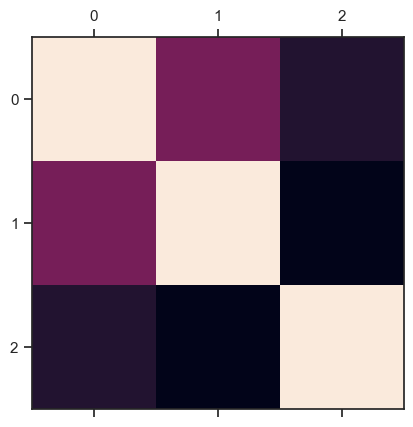

In [228]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

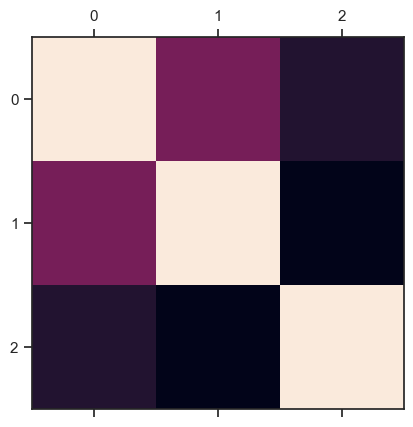

In [229]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [230]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Ryan Pares\\Zomato\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

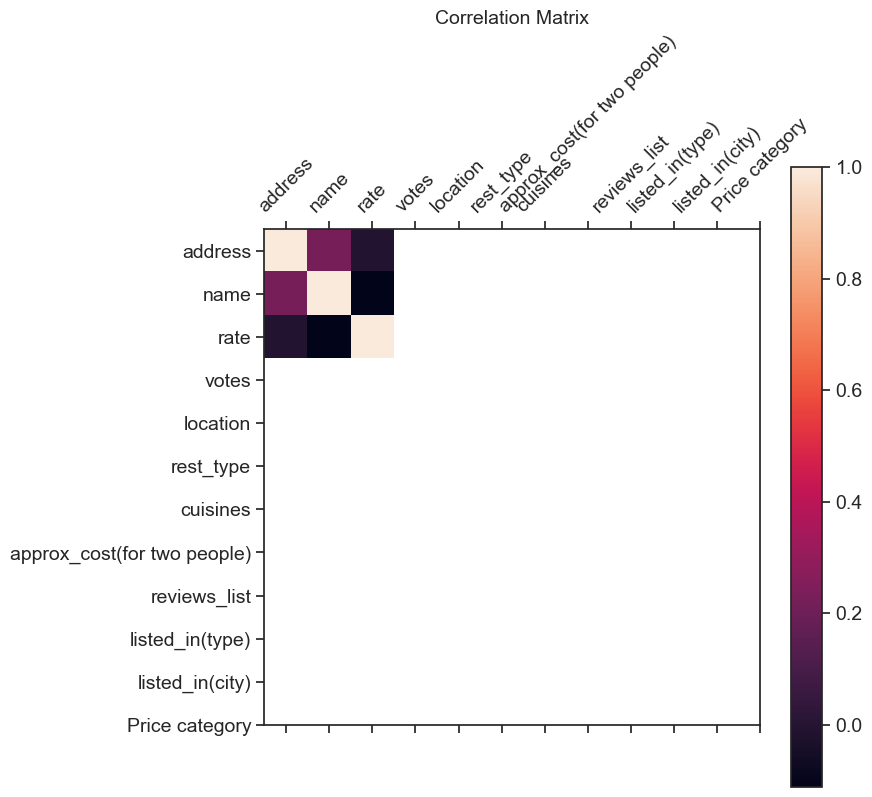

In [231]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [232]:
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Price category'],
      dtype='object')

In [233]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['votes', 'approx_cost(for two people)', 'rate']]

In [234]:
sub

,votes,approx_cost(for two people),rate
0,775,800,4
1,787,800,4
2,918,800,4
3,88,300,4
4,166,600,4
...,...,...,...
43735,34,800,4
43736,81,800,2
43737,27,0,4
43738,236,0,4


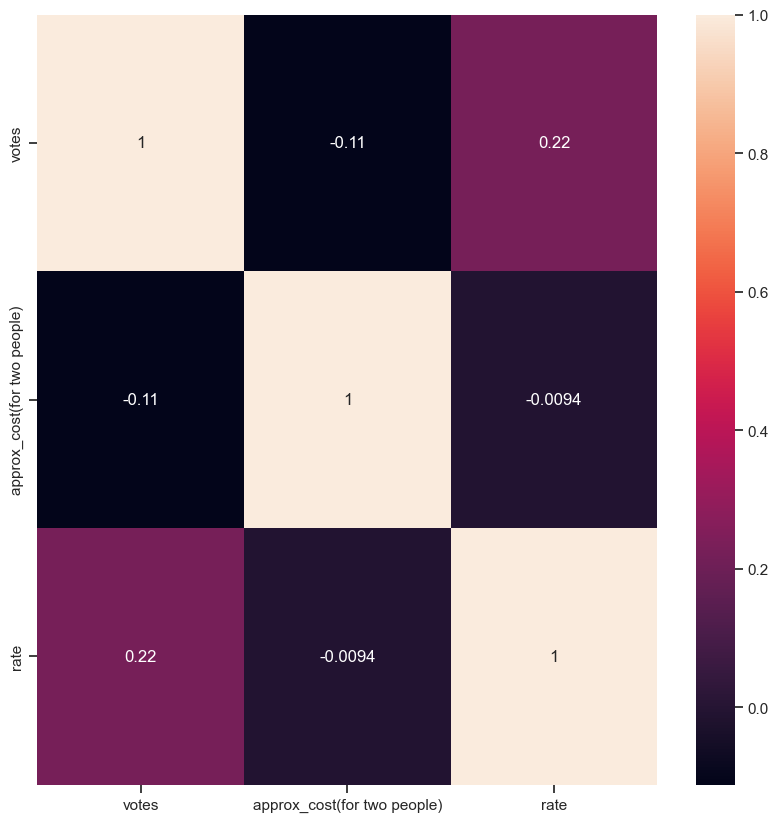

In [235]:
# Create a subplot with matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Assuming 'sub' is your DataFrame and 'corr' is the correlation matrix
corr = sub.corr()

# Create the correlation heatmap in seaborn
sns.heatmap(corr, annot=True, ax=ax)

# Display the plot
plt.show()

#### The correlation matrix heatmap shows the relationships between three variables: ‘votes’, ‘approx_cost(for two people)’, and ‘rate’. Here are the key points:

#### Votes and Approximate Cost: There is a very weak negative correlation (-0.11), indicating that as the cost increases, the number of votes slightly decreases.
#### Votes and Rate: There is a weak positive correlation (0.22), suggesting that higher-rated restaurants tend to receive more votes.
#### Approximate Cost and Rate: There is a very weak negative correlation (-0.0094), indicating almost no relationship between the cost and the rating.
#### Overall, the correlations are weak, suggesting that these variables do not strongly influence each other.

# Question 4

### 3.2 Scatterplots

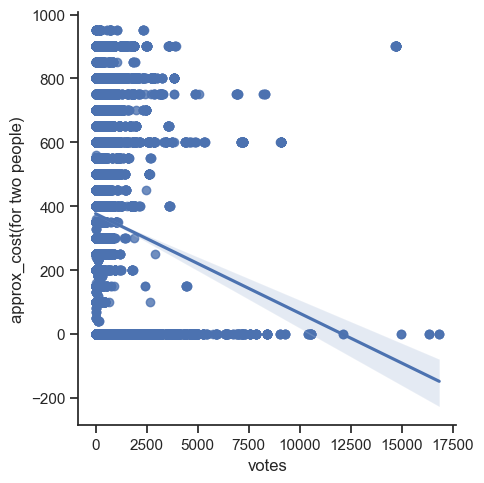

In [236]:
# Create a scatterplot for the "votes" and "approx_cost(for two people)" columns in seaborn

sns.lmplot(x = 'votes', y = 'approx_cost(for two people)', data = df)

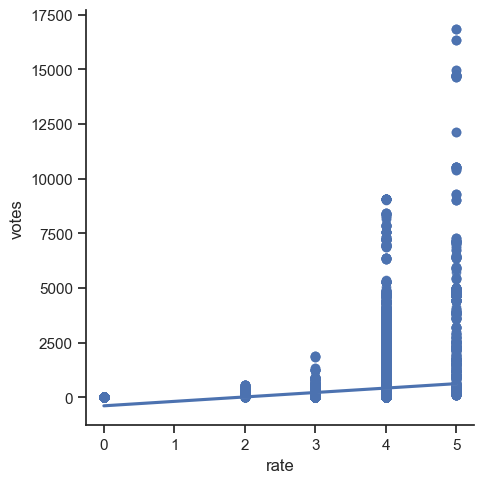

In [237]:
# Create a scatterplot for the "rate age" and "approx_cost(for two people)" columns in seaborn

sns.lmplot(x = 'rate', y = 'votes', data = df)

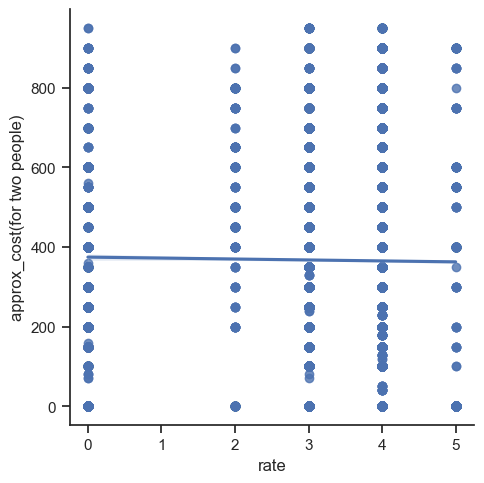

In [238]:
# Create a scatterplot for the "rate age" and "approx_cost(for two people)" columns in seaborn

sns.lmplot(x = 'rate', y = 'approx_cost(for two people)', data = df)

# Question 5

### 3.3 Pair Plots

In [239]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['votes', 'approx_cost(for two people)', 'rate']]

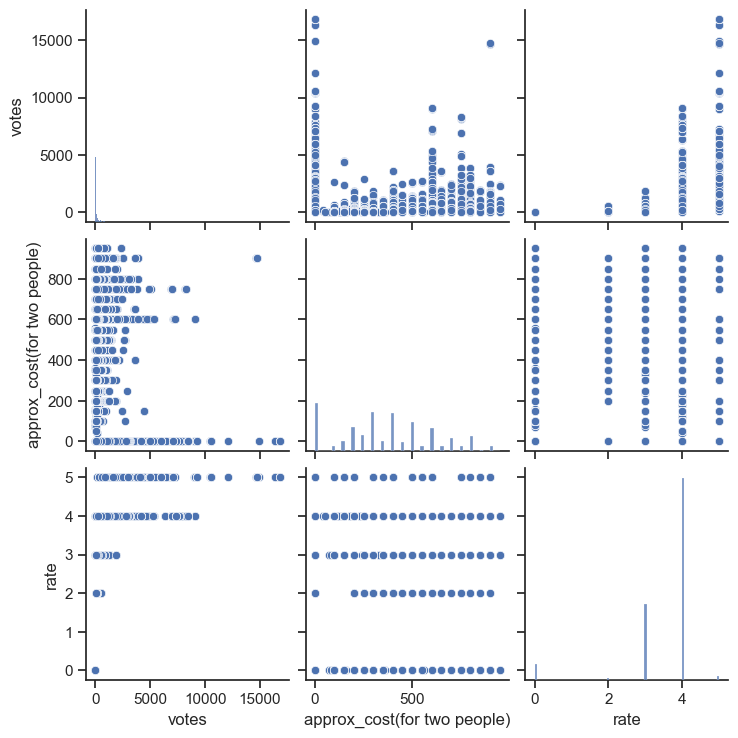

In [240]:
# Create a pair plot 

g = sns.pairplot(sub_2)

# Question 6

### 3.4 Categorical Plots

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Count'>

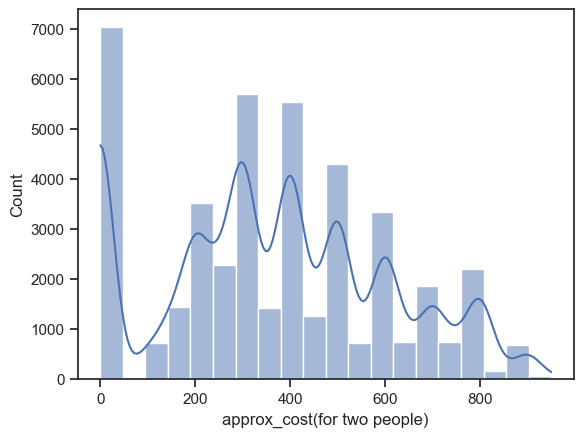

In [241]:
# Use a histogram to visualize the distribution of the approximate cost for 2 people. 
# Sensible price categories are created for the price ranges. 

sns.histplot(df['approx_cost(for two people)'], bins = 20, kde = True)

#### The histogram with a KDE line shows the distribution of approximate costs for two people. Here are the key points:

#### Peak Frequency: The highest frequency of costs is around 200, indicating that most dining options fall within this price range.
#### Moderate Costs: There is a significant number of dining options in the 200-600 range, showing a moderate cost distribution.
#### High Costs: Fewer dining options are available above 600, indicating that expensive dining options are less common.

In [242]:
df.loc[df['approx_cost(for two people)'] < 200, 'Price category'] = 'Inexpensive'

In [243]:
df.loc[(df['approx_cost(for two people)'] >= 200) & (df['approx_cost(for two people)'] < 500), 'Price category'] = 'Moderate'

In [244]:
df.loc[df['approx_cost(for two people)'] >= 500, 'Price category'] = 'Expensive'

In [245]:
df['Price category'].value_counts(dropna = False)

Moderate       19725
Expensive      14811
Inexpensive     9204
Name: Price category, dtype: int64

In [246]:
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Price category'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

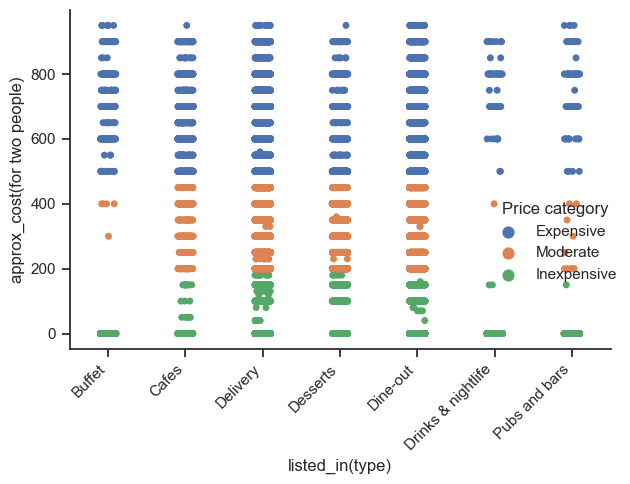

In [247]:
# Create a categorical plot in seaborn using the price categories created above

# Set the style
sns.set(style="ticks")

# Create a larger figure to accommodate labels
plt.figure(figsize=(12, 8))

# Create the categorical plot
cat_plot = sns.catplot(x="listed_in(type)", y="approx_cost(for two people)", hue="Price category", data=df)

# Rotate x-axis labels for better fit
cat_plot.set_xticklabels(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

In [248]:
# fig = g.get_figure()
g.savefig("out.png")  

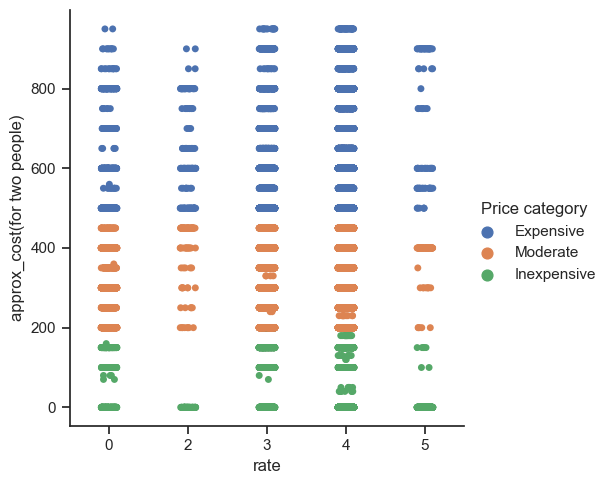

In [249]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="rate", y="approx_cost(for two people)", hue="Price category", data=df)

In [250]:
# fig = g.get_figure()
g.savefig("out.png")  

#### The scatter plot shows the relationship between the approximate cost for two people and the rating of various dining options, categorized by price.

#### Inexpensive Options: These are mostly clustered towards the lower end of the cost axis but have a wide range of ratings, indicating that lower-cost options can still receive high ratings.
#### Moderate Options: These are spread more evenly across both cost and rating axes, suggesting a balance between cost and customer satisfaction.
#### Expensive Options: These tend to occupy the higher end of the cost axis but also show a wide range of ratings, indicating that higher cost does not necessarily guarantee higher ratings.
#### Overall, the chart suggests that customer satisfaction, as indicated by ratings, is not strictly dependent on the cost of dining.

# Question 7

### Answers to initial key questions 

#### Key Questions: 
#### • Q What factors have the strongest correlation with high customer ratings? 
####    A Weak positive correlation (0.22), suggesting that higher-rated restaurants tend to receive more votes. Overall, the correlations are weak, suggesting that these variables do not strongly influence each other.


#### Needs further analysis of geographical data:
#### • Q How does the average cost for two influence restaurant ratings and customer reviews across different neighbourhoods? 
#### • Q Which neighbourhoods in Bangalore have the highest concentration of top-rated restaurants or most popular cuisine types? 
#### • Q Which types of cuisine are most common and highly rated in different areas of Bangalore? 
#### • Q Are there any patterns in restaurant types (e.g., fast food vs. fine dining) across Bangalore’s various neighbourhoods? 
#### • Q Based on popular restaurant concentrations, which areas in Bangalore might be emerging as dining hotspots?

#### Additional Questions
#### • Q Which restraunts are most common in terms of different price categories? (Inexpensive, Moderate & Expensive)
####    A Most options are affordable, with a smaller number of higher-cost options. Highest frequency is in Inexpensive & Moderate categories.
#### • Q What is the trend with ratings & votes? 
####    A There is a general trend where higher ratings (‘rate’) are associated with a higher number of votes (‘votes’). This suggests that more popular or highly-rated restraunts tend to receive more votes.


# Question 8

### Hypothesis

#### Hypothesis: “In Bangalore, the popularity and ratings of restaurants are significantly influenced by factors such as cuisine type, location, and price range. Specifically, higher-rated restaurants tend to have more votes, and certain neighborhoods with specific cuisine types and price ranges are more likely to have top-rated dining options.”

#### This hypothesis aims to explore the relationships between restaurant ratings, customer preferences, and geographical patterns in Bangalore